In [ ]:
# Step 1: Import libraries and set up environment
# Step 2: Define workflow state and nodes
# Step 3: Build and compile the workflow graph
# Step 4: Run workflow in different threads (sessions)
# Step 5: Demonstrate persistence by saving and restoring checkpoints
# Step 6: Show time travel by updating state at a checkpoint and invoking from that point
# Step 7: Inspect state history for debugging and auditing

from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

load_dotenv()

llm = ChatOpenAI()

class JokeState(TypedDict):

    topic:str
    joke:str
    explanation:str

def generate_joke(state:JokeState):

    prompt=f"generate a joke on the topic {state['topic']}"
    response=llm.invoke(prompt).content

    return {'joke':response}

def generate_explanation(state:JokeState):

    prompt=f"Write an explanation for the joke - {state['joke']}"
    response=llm.invoke(prompt).content

    return {'explanation':response}

graph = StateGraph(JokeState)

#nodes
graph.add_node('generate_joke',generate_joke)
graph.add_node('generate_explanation',generate_explanation)

#edges
graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','generate_explanation')
graph.add_edge('generate_explanation',END)

checkpointer = InMemorySaver()

graph.compile(checkpointer=checkpointer)

workflow=graph.compile(checkpointer=checkpointer)

config1 = {'configurable':{'thread_id':"1"}}
workflow.invoke({'topic':'pizza'},config=config1)

workflow.get_state(config1)

list(workflow.get_state_history(config1))

config2 = {'configurable':{'thread_id':"2"}}
workflow.invoke({'topic':'pasta'},config=config2)


{
    "cells": [
        {
            "cell_type": "code",
            "id": "#VSC-703a88f7",
            "metadata": {
                "language": "python"
            },
            "source": [
                "from langgraph.graph import StateGraph, START, END",
                "from typing import TypedDict",
                "from langchain_openai import ChatOpenAI",
                "from dotenv import load_dotenv",
                "from langgraph.checkpoint.memory import InMemorySaver"
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-0258e002",
            "metadata": {
                "language": "python"
            },
            "source": [
                "load_dotenv()",
                "",
                "llm = ChatOpenAI()"
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-e5f8a181",
            "metadata": {
                "language": "python"
            },
            "source": [
                "class JokeState(TypedDict):",
                "",
                "    topic:str",
                "    joke:str",
                "    explanation:str"
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-4b035ed8",
            "metadata": {
                "language": "python"
            },
            "source": [
                "def generate_joke(state:JokeState):",
                "",
                "    prompt=f\"generate a joke on the topic {state['topic']}\"",
                "    response=llm.invoke(prompt).content",
                "",
                "    return {'joke':response}",
                "",
                "",
                "def generate_explanation(state:JokeState):",
                "",
                "    prompt=f\"Write an explanation for the joke - {state['joke']}\"",
                "    response=llm.invoke(prompt).content",
                "",
                "    return {'explanation':response}"
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-7ea0dd2e",
            "metadata": {
                "language": "python"
            },
            "source": [
                "graph = StateGraph(JokeState)",
                "",
                "#nodes",
                "graph.add_node('generate_joke',generate_joke)",
                "graph.add_node('generate_explanation',generate_explanation)",
                "",
                "#edges",
                "graph.add_edge(START,'generate_joke')",
                "graph.add_edge('generate_joke','generate_explanation')",
                "graph.add_edge('generate_explanation',END)",
                "",
                "checkpointer = InMemorySaver()",
                "",
                "graph.compile(checkpointer=checkpointer)",
                ""
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-e885c809",
            "metadata": {
                "language": "python"
            },
            "source": [
                "workflow=graph.compile(checkpointer=checkpointer)"
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-e6e78120",
            "metadata": {
                "language": "python"
            },
            "source": [
                "config1 = {'configurable':{'thread_id':\"1\"}}",
                "workflow.invoke({'topic':'pizza'},config=config1)"
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-4d4eecb0",
            "metadata": {
                "language": "python"
            },
            "source": [
                "workflow.get_state(config1)"
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-7b4debe5",
            "metadata": {
                "language": "python"
            },
            "source": [
                "list(workflow.get_state_history(config1))"
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-8e7fd8e3",
            "metadata": {
                "language": "python"
            },
            "source": [
                "config2 = {'configurable':{'thread_id':\"2\"}}",
                "workflow.invoke({'topic':'pasta'},config=config2)"
            ]
        },
        {
            "cell_type": "code",
            "id": "#VSC-abd040ab",
            "metadata": {
                "language": "python"
            },
            "source": [
                ""
            ]
        }
    ]
}

In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from langgraph.checkpoint.memory import InMemorySaver

In [4]:
load_dotenv()

llm = ChatOpenAI()

In [5]:
class JokeState(TypedDict):

    topic:str
    joke:str
    explanation:str

In [8]:
def generate_joke(state:JokeState):

    prompt=f"generate a joke on the topic {state['topic']}"
    response=llm.invoke(prompt).content

    return {'joke':response}


def generate_explanation(state:JokeState):

    prompt=f"Write an explanation for the joke - {state['joke']}"
    response=llm.invoke(prompt).content

    return {'explanation':response}

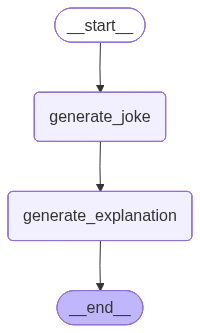

In [9]:
graph = StateGraph(JokeState)

#nodes
graph.add_node('generate_joke',generate_joke)
graph.add_node('generate_explanation',generate_explanation)

#edges
graph.add_edge(START,'generate_joke')
graph.add_edge('generate_joke','generate_explanation')
graph.add_edge('generate_explanation',END)

checkpointer = InMemorySaver()

graph.compile(checkpointer=checkpointer)


In [10]:
workflow=graph.compile(checkpointer=checkpointer)

In [14]:
config1 = {'configurable':{'thread_id':"1"}}
workflow.invoke({'topic':'pizza'},config=config1)

{'topic': 'pizza',
 'joke': "Why did the pizza go to the therapist? Because it had too many toppings and couldn't stop feeling saucy!",
 'explanation': 'This joke plays on the double meaning of the word "toppings." In the context of pizza, toppings refer to the ingredients placed on top of the pizza dough before baking. But in a psychological context, "toppings" can refer to emotional baggage or issues that someone is dealing with. In this joke, the pizza goes to a therapist because it has too many toppings (both in terms of ingredients and emotional baggage) and can\'t stop feeling "saucy," which can mean both having a lot of sauce on it and acting sassy or flirtatious.'}

In [15]:
workflow.get_state(config1)

StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the pizza go to the therapist? Because it had too many toppings and couldn't stop feeling saucy!", 'explanation': 'This joke plays on the double meaning of the word "toppings." In the context of pizza, toppings refer to the ingredients placed on top of the pizza dough before baking. But in a psychological context, "toppings" can refer to emotional baggage or issues that someone is dealing with. In this joke, the pizza goes to a therapist because it has too many toppings (both in terms of ingredients and emotional baggage) and can\'t stop feeling "saucy," which can mean both having a lot of sauce on it and acting sassy or flirtatious.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08f001-4ec5-6e3b-800e-210a45970a55'}}, metadata={'source': 'loop', 'step': 14, 'parents': {}}, created_at='2025-09-11T11:11:36.229184+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_n

In [17]:
list(workflow.get_state_history(config1))

[StateSnapshot(values={'topic': 'pizza', 'joke': "Why did the pizza go to the therapist? Because it had too many toppings and couldn't stop feeling saucy!", 'explanation': 'This joke plays on the double meaning of the word "toppings." In the context of pizza, toppings refer to the ingredients placed on top of the pizza dough before baking. But in a psychological context, "toppings" can refer to emotional baggage or issues that someone is dealing with. In this joke, the pizza goes to a therapist because it has too many toppings (both in terms of ingredients and emotional baggage) and can\'t stop feeling "saucy," which can mean both having a lot of sauce on it and acting sassy or flirtatious.'}, next=(), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '1f08f001-4ec5-6e3b-800e-210a45970a55'}}, metadata={'source': 'loop', 'step': 14, 'parents': {}}, created_at='2025-09-11T11:11:36.229184+00:00', parent_config={'configurable': {'thread_id': '1', 'checkpoint_

In [19]:
config2 = {'configurable':{'thread_id':"2"}}
workflow.invoke({'topic':'pasta'},config=config2)

{'topic': 'pasta',
 'joke': 'Why did the spaghetti go to the party? Because it was feeling saucy!',
 'explanation': 'This joke plays on the double meaning of the word "saucy." In one sense, "saucy" can mean bold, cheeky, or impudent. In another sense, it can also refer to the sauce that is commonly paired with pasta dishes like spaghetti. So, the joke is suggesting that the spaghetti went to the party because it was feeling bold or cheeky, but also because it wanted to be paired with a sauce.'}